In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report


c:\Users\Abhilash Reddy\anaconda3\lib\site-packages\numpy\__init__.py:143: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "c:\Users\Abhilash Reddy\anaconda3\python.exe"
  * The NumPy version is: "1.20.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


In [ ]:
coded_id = pd.read_csv("data/Social_spammers_dataset/users/coded_ids.csv")
features = pd.read_csv("data/Social_spammers_dataset/users_features/features.csv")
users = pd.merge(features, coded_id, on='user_id', how='left')

train = pd.read_csv("data/Social_spammers_dataset/users/coded_ids_labels_train.csv")
test = pd.read_csv("data/Social_spammers_dataset/users/coded_ids_labels_test.csv")
train = pd.merge(users, train, on='coded_id', how='right')
test = pd.merge(users, test, on='coded_id', how='right')

In [ ]:
train.shape

(686, 125)

In [ ]:
test.shape

(81, 124)

In [ ]:
#cleaning train dataset

#remove columns with na values
nacolumns = train.columns[train.isna().any()].tolist()
train.drop(columns = nacolumns,inplace=True)
train.dropna(axis=0,inplace=True)

#remove unwanted category columns like time and IDs
unwanted = ["default_profile","default_profile_image","avg_intertweet_times","date_newest_tweet","lang","min_intertweet_times","std_nb_symbols_per_tweet","std_nb_symbols_per_word_in_the_tweet","date_oldest_tweet","max_intertweet_times","max_nb_symbols_per_tweet","max_nb_symbols_per_word_in_the_tweet","std_intertweet_times","user_id","coded_id"]
train.drop(columns=unwanted,inplace=True)

#remove columns like 
allzero_cols = list(train.loc[:,(train==0).all()].columns)
train.drop(columns=allzero_cols,inplace=True)


In [ ]:
#cleaning test dataset

#remove columns with na values
nacolumns = test.columns[test.isna().any()].tolist()
test.drop(columns = nacolumns,inplace=True)
test.dropna(axis=0,inplace=True)

#remove unwanted category columns like time and IDs
unwanted = ["default_profile","default_profile_image","avg_intertweet_times","date_newest_tweet","lang","min_intertweet_times","std_nb_symbols_per_tweet","std_nb_symbols_per_word_in_the_tweet","date_oldest_tweet","max_intertweet_times","max_nb_symbols_per_tweet","max_nb_symbols_per_word_in_the_tweet","std_intertweet_times","user_id","coded_id"]
test.drop(columns=unwanted,inplace=True)

#remove columns like 
allzero_cols = list(test.loc[:,(test==0).all()].columns)
test.drop(columns=allzero_cols,inplace=True)


In [ ]:
#split data into x features and labels
x = train.iloc[:,:124]

#normalizing the numerical features
scale = StandardScaler()
x = scale.fit_transform(x)
test = scale.fit_transform(test)

y = train.label

In [ ]:
x.shape

(686, 124)

In [ ]:
y.value_counts()

0    568
1    118
Name: label, dtype: int64

In [ ]:
#train test (validation) split
x_train, x_test, y_train, y_test = train_test_split(x,y ,stratify=y, test_size=0.15,random_state=1)

In [ ]:
#function for performing grid search

def grid_search(model,params):
  skf = StratifiedKFold(n_splits=10)
  gs = GridSearchCV(model, cv=skf, param_grid=params, return_train_score=True)
  gs.fit(x_train, y_train)
  print("Accuracy =",gs.best_score_)

In [ ]:
#naives bayes test
model = GaussianNB(var_smoothing=0.1)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print('Model train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model test accuracy score: {0:0.4f}'. format(accuracy_score(test, y_pred_test)))

Model train accuracy score: 0.9228
              precision    recall  f1-score   support

           0       0.99      0.88      0.93        85
           1       0.63      0.94      0.76        18

    accuracy                           0.89       103
   macro avg       0.81      0.91      0.84       103
weighted avg       0.92      0.89      0.90       103



In [2]:
#knn test

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print('Model train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
#svm

from sklearn.svm import SVC

model = SVC()
params = {"C":[0.1,1,10],
          "kernel":["linear", "poly", "rbf", "sigmoid"]}
grid_search(model,params)

best params =  {'C': 10, 'kernel': 'poly'}
best score = 0.9571011104617183


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
params = {"criterion":["gini","entropy"],
          "max_depth":range(1,10),
          "min_samples_split":range(2,10),
          "min_samples_leaf":range(1,5)}
grid_search(model,params)

best params =  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 9}
best score = 0.9588544710695499


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_search(model,params)

best params =  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}
best score = 0.9622735242548217


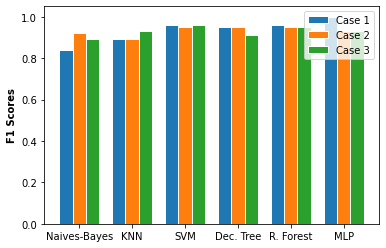

In [ ]:
from matplotlib import pyplot as plt

barWidth = 0.25
 


# set height of bar
bars1 = [0.84,0.89,0.96,0.95,0.96]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Case 1')
 
# Add xticks on the middle of the group bars
plt.ylabel('F1 Scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Naives-Bayes', 'KNN', 'SVM', 'Dec. Tree', 'R. Forest'])
 
# Create legend & Show graphic
plt.legend()